In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import joblib

import spacy
import contractions
import string
import re
from bs4 import BeautifulSoup
from unidecode import unidecode
import nltk
import swifter
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline
from transformers import AutoTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from multiprocessing import Pool
from sklearn.feature_extraction.text import HashingVectorizer


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv('/LIAR_preprocessed_nolemma.csv')

In [3]:
X = df['text']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969 entries, 0 to 7968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   7969 non-null   int64 
 1   text    7969 non-null   object
dtypes: int64(1), object(1)
memory usage: 124.6+ KB


In [5]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_train_bow = preprocessing.normalize(X_train_bow)
X_test_bow = preprocessing.normalize(X_test_bow)

In [6]:
# -------------- Grid Search CV --------------

#testing_parameters = { 
#                        'n_estimators': [50,100,200,300],
#                        'criterion': ['gini', 'entropy'],
#                        'max_depth': [4,6,8,10],
 #                                         }
#
#model_random_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=testing_parameters, cv=5)
#model_random_search.fit(X_train_bow, y_train)

#print("The most optimal parameters for RandomForestClassifier are: ",model_random_search.best_params_)
#print("The precision that model can reach for the current model",model_random_search.best_score_*100) 

#The most optimal parameters for RandomForestClassifier are:  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
#The precision that model can reach for the current model 85.31977453749546

In [7]:
RFC = RandomForestClassifier(criterion='entropy', max_depth= 10, n_estimators= 300)
RFC.fit(X_train_bow, y_train)

prd_RFC = RFC.predict(X_test_bow)

In [8]:
print(classification_report(y_test, prd_RFC))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73      1356
           1       0.84      0.06      0.11      1035

    accuracy                           0.59      2391
   macro avg       0.71      0.53      0.42      2391
weighted avg       0.69      0.59      0.46      2391



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [10]:
binary_predictions = []

for i in prd_RFC:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.588038477624425
Precision on testing set: 0.05990338164251208
Recall on testing set: 0.8378378378378378


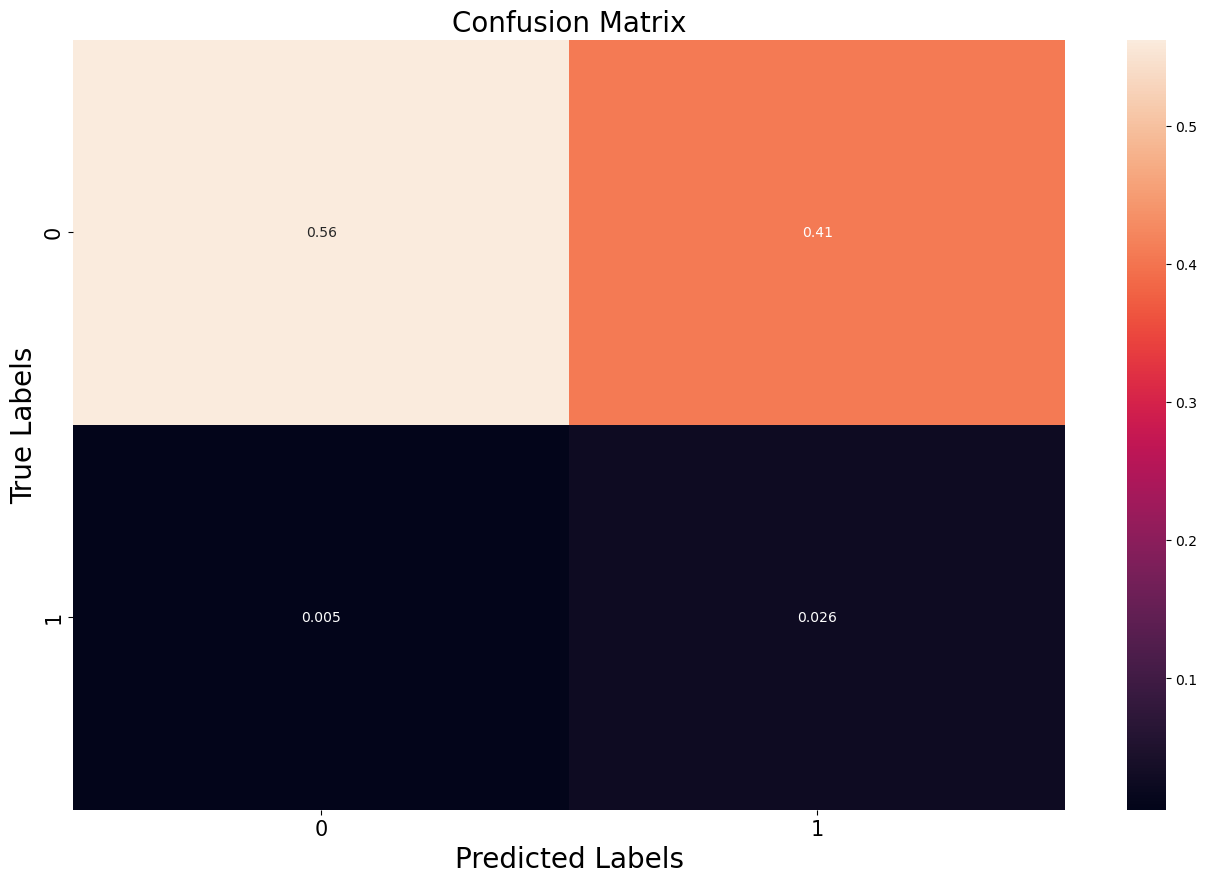

In [11]:
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

In [ ]:
prd_df = pd.read_csv('/HugeDatasetPredictSample.csv')

val_text = prd_df['text']
val_label = prd_df['label']

In [13]:
val_text_bow = vectorizer.transform(val_text)

val_text_bow = preprocessing.normalize(val_text_bow)

In [14]:
pred = RFC.predict(val_text_bow)

In [15]:
binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

Accuracy on testing set: 0.6867
Precision on testing set: 0.0006379585326953748
Recall on testing set: 1.0


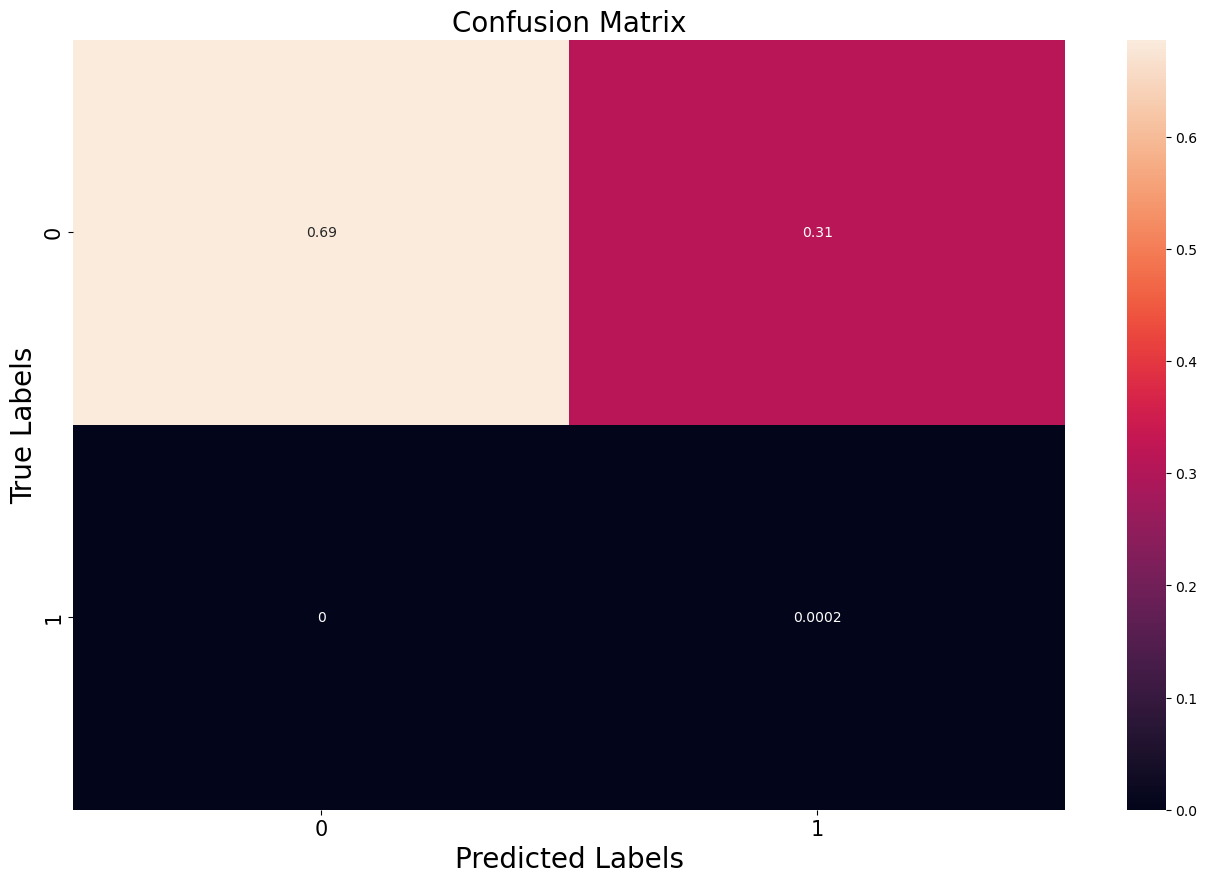

In [16]:
matrix = confusion_matrix(binary_predictions, val_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions, val_label))
print('Precision on testing set:', precision_score(binary_predictions, val_label))
print('Recall on testing set:', recall_score(binary_predictions, val_label))

In [17]:
print("LIAR Classification Report on Fake News Corpus Validation set (Using RFC)\n")
print(classification_report(binary_predictions, val_label))

LIAR Classification Report on Fake News Corpus Validation set (Using RFC)

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      9998
           1       0.00      1.00      0.00         2

    accuracy                           0.69     10000
   macro avg       0.50      0.84      0.41     10000
weighted avg       1.00      0.69      0.81     10000



Accuracy on testing set: 0.48977452227518625
Precision on testing set: 0.00038346709030649977
Recall on testing set: 0.7368421052631579


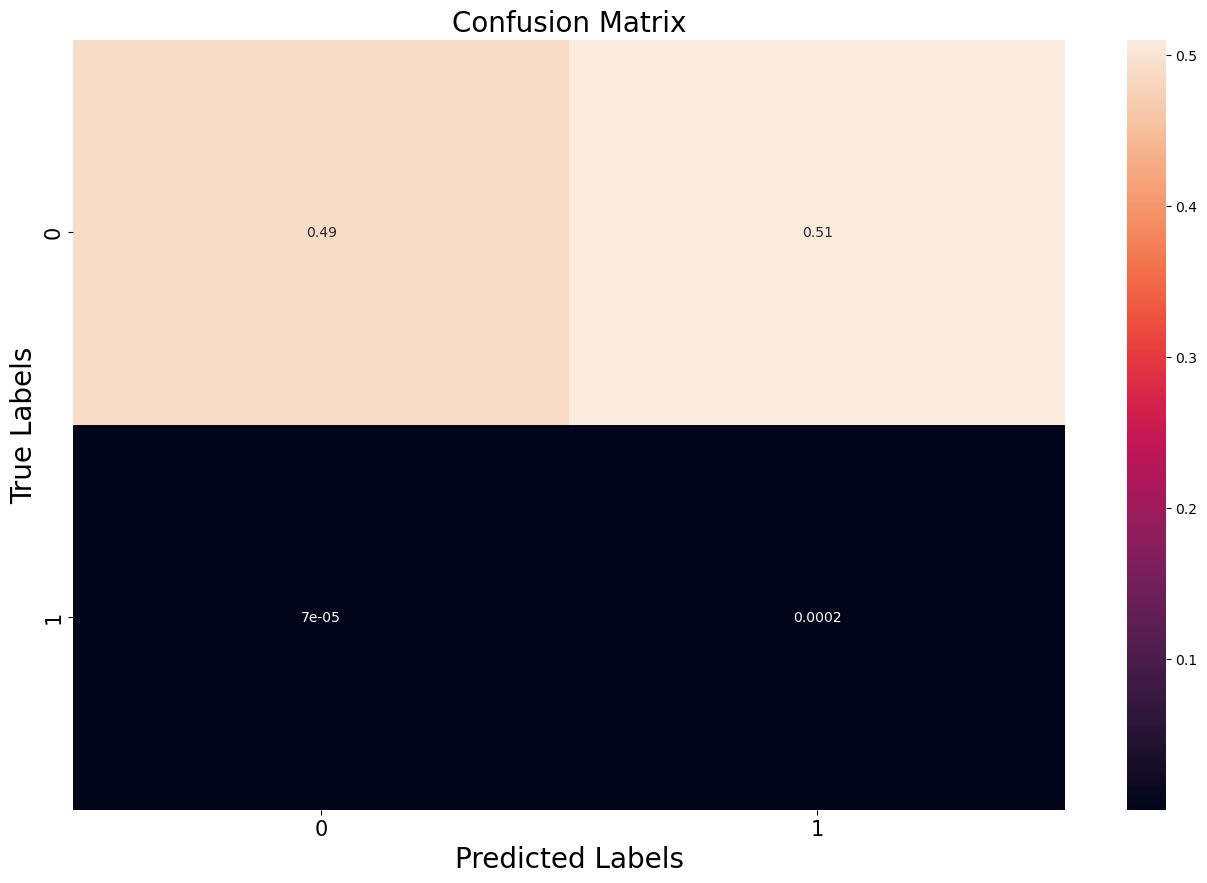

In [ ]:
val02_df = pd.read_csv('/WELFake_Dataset.csv')

val02_df.dropna(inplace=True)

val02_text = val02_df['text']
val02_label = val02_df['label']

val02_text_bow = vectorizer.transform(val02_text)

val02_text_bow = preprocessing.normalize(val02_text_bow)

pred_val02 = RFC.predict(val02_text_bow)

binary_predictions_val02 = []

for i in pred_val02:
    if i >= 0.5:
        binary_predictions_val02.append(1)
    else:
        binary_predictions_val02.append(0) 
        
matrix = confusion_matrix(binary_predictions_val02, val02_label, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

print('Accuracy on testing set:', accuracy_score(binary_predictions_val02, val02_label))
print('Precision on testing set:', precision_score(binary_predictions_val02, val02_label))
print('Recall on testing set:', recall_score(binary_predictions_val02, val02_label))

In [22]:
print("LIAR Classification Report on WELFake set (Using RFC)\n")
print(classification_report(binary_predictions_val02, val02_label))

LIAR Classification Report on WELFake set (Using RFC)

              precision    recall  f1-score   support

           0       1.00      0.49      0.66     71518
           1       0.00      0.74      0.00        19

    accuracy                           0.49     71537
   macro avg       0.50      0.61      0.33     71537
weighted avg       1.00      0.49      0.66     71537

